In [26]:
import pandas as pd

# Read CSV file
df = pd.read_csv(r"E:\Sakthi\prasanth\projects\swiggypro\swiggy\Scripts\swiggy.csv")
print(df.head())

       id               name    city rating     rating_count   cost  \
0  567335     AB FOODS POINT  Abohar     --  Too Few Ratings  ₹ 200   
1  531342  Janta Sweet House  Abohar    4.4      50+ ratings  ₹ 200   
2  158203  theka coffee desi  Abohar    3.8     100+ ratings  ₹ 100   
3  187912          Singh Hut  Abohar    3.7      20+ ratings  ₹ 250   
4  543530      GRILL MASTERS  Abohar     --  Too Few Ratings  ₹ 250   

                      cuisine          lic_no  \
0            Beverages,Pizzas  22122652000138   
1               Sweets,Bakery  12117201000112   
2                   Beverages  22121652000190   
3            Fast Food,Indian  22119652000167   
4  Italian-American,Fast Food  12122201000053   

                                                link  \
0  https://www.swiggy.com/restaurants/ab-foods-po...   
1  https://www.swiggy.com/restaurants/janta-sweet...   
2  https://www.swiggy.com/restaurants/theka-coffe...   
3  https://www.swiggy.com/restaurants/singh-hut-n...  

In [27]:
# Basic exploration
print("\nDataset Shape:", df.shape)
print("\nColumn Names:")
print(df.columns.tolist())
print("\nDataset Info:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())


Dataset Shape: (148541, 11)

Column Names:
['id', 'name', 'city', 'rating', 'rating_count', 'cost', 'cuisine', 'lic_no', 'link', 'address', 'menu']

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148541 entries, 0 to 148540
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            148541 non-null  int64 
 1   name          148455 non-null  object
 2   city          148541 non-null  object
 3   rating        148455 non-null  object
 4   rating_count  148455 non-null  object
 5   cost          148410 non-null  object
 6   cuisine       148442 non-null  object
 7   lic_no        148312 non-null  object
 8   link          148541 non-null  object
 9   address       148455 non-null  object
 10  menu          148541 non-null  object
dtypes: int64(1), object(10)
memory usage: 12.5+ MB
None

Missing Values:
id                0
name             86
city              0
rating           86
rating_count

In [ ]:
import pandas as pd

# Columns to exclude
exclude_columns = ['lic_no', 'link', 'address', 'menu']

# Columns to lowercase and strip
columns_to_lowercase = [col for col in df.columns if col not in exclude_columns]

for col in columns_to_lowercase:
    if df[col].dtype == 'object':  # only apply to text columns
        df[col] = df[col].str.strip().str.lower()

print(df.head())

       id               name    city rating     rating_count   cost  \
0  567335     ab foods point  abohar     --  too few ratings  ₹ 200   
1  531342  janta sweet house  abohar    4.4      50+ ratings  ₹ 200   
2  158203  theka coffee desi  abohar    3.8     100+ ratings  ₹ 100   
3  187912          singh hut  abohar    3.7      20+ ratings  ₹ 250   
4  543530      grill masters  abohar     --  too few ratings  ₹ 250   

                      cuisine          lic_no  \
0            beverages,pizzas  22122652000138   
1               sweets,bakery  12117201000112   
2                   beverages  22121652000190   
3            fast food,indian  22119652000167   
4  italian-american,fast food  12122201000053   

                                                link  \
0  https://www.swiggy.com/restaurants/ab-foods-po...   
1  https://www.swiggy.com/restaurants/janta-sweet...   
2  https://www.swiggy.com/restaurants/theka-coffe...   
3  https://www.swiggy.com/restaurants/singh-hut-n...  

In [ ]:
# Dropping unwanted columns
columns_to_drop = ['id', 'lic_no', 'link', 'menu']

df = df.drop(columns=columns_to_drop)

print(df.head())

                name    city rating     rating_count   cost  \
0     ab foods point  abohar     --  too few ratings  ₹ 200   
1  janta sweet house  abohar    4.4      50+ ratings  ₹ 200   
2  theka coffee desi  abohar    3.8     100+ ratings  ₹ 100   
3          singh hut  abohar    3.7      20+ ratings  ₹ 250   
4      grill masters  abohar     --  too few ratings  ₹ 250   

                      cuisine  \
0            beverages,pizzas   
1               sweets,bakery   
2                   beverages   
3            fast food,indian   
4  italian-american,fast food   

                                             address  
0  AB FOODS POINT, NEAR RISHI NARANG DENTAL CLINI...  
1  Janta Sweet House, Bazar No.9, Circullar Road,...  
2         theka coffee desi, sahtiya sadan road city  
3    Singh Hut, CIRCULAR ROAD NEAR NEHRU PARK ABOHAR  
4  GRILL MASTERS, ADA Heights, Abohar - Hanumanga...  


In [ ]:

# Check duplicate rows
print("\nNumber of duplicate rows:", df.duplicated().sum())


Number of duplicate rows: 26


In [31]:
# Display duplicate rows
duplicate_rows = df[df.duplicated()]
print("\nDuplicate rows:")
print(duplicate_rows)


Duplicate rows:
                     name                           city rating  rating_count  \
33046                 NaN            west chd,chandigarh    NaN           NaN   
36544                 NaN            george town,chennai    NaN           NaN   
62296   gold star biryani                       dindigul    4.0  100+ ratings   
66887                 NaN          sector 15_fbd,gurgaon    NaN           NaN   
81422                 NaN                   ichalkaranji    NaN           NaN   
81428                 NaN                   ichalkaranji    NaN           NaN   
85516                 NaN                        kaithal    NaN           NaN   
88676                 NaN                     kodaikanal    NaN           NaN   
96582                 NaN               jadavpur,kolkata    NaN           NaN   
96583                 NaN               jadavpur,kolkata    NaN           NaN   
96585                 NaN               jadavpur,kolkata    NaN           NaN   
98584      

In [ ]:
# Display all rows for 'gold star biryani'
gold_star_biryani_rows = df[df['name'].str.contains('gold star biryani', case=False, na=False)]
print("\nAll rows for 'gold star biryani':")
print(gold_star_biryani_rows)


All rows for 'gold star biryani':
                    name      city rating  rating_count   cost  \
62284  gold star biryani  dindigul    4.0  100+ ratings  ₹ 300   
62296  gold star biryani  dindigul    4.0  100+ ratings  ₹ 300   
62301  gold star biryani  dindigul    4.1  100+ ratings  ₹ 300   

                         cuisine                                       address  
62284  north indian,south indian  Gold Star Biryani, RS Road Dindigul - 624001  
62296  north indian,south indian  Gold Star Biryani, RS Road Dindigul - 624001  
62301  north indian,south indian  Gold Star Biryani, RS Road Dindigul - 624001  


In [ ]:
# Drop duplicate rows, keeping the first row
df.drop_duplicates(inplace=True)

print("\nNumber of duplicate rows after dropping:", df.duplicated().sum())


Number of duplicate rows after dropping: 0


In [34]:
df.shape

(148515, 7)

Name Process

In [36]:
# Display the rows with duplicate names
duplicate_names_rows = df[df['name'].duplicated(keep=False)].sort_values(by='name')
print("\nRows with duplicate restaurant names:")
duplicate_names_rows


Rows with duplicate restaurant names:


,name,city,rating,rating_count,cost,cuisine,address
49041,#waffles,"mayur vihar,delhi",3.0,20+ ratings,₹ 200,desserts,"#Waffles, Plot no 88 , Pharma Apartments , IP ..."
72626,#waffles,"begumpet,hyderabad",3.9,50+ ratings,₹ 400,desserts,"#Waffles, Sindhi Colony, Opposite Lakshmi Vila..."
49636,#waffles,"laxmi nagar,delhi",--,too few ratings,₹ 300,"desserts,beverages","#waffles, B-11, Surya nagar"
58283,(icf) indian chaat factory,"indirapuram,delhi",3.5,20+ ratings,₹ 300,"chaat,north indian","(ICF) INDIAN CHAAT FACTORY, SHOP NO. 10C, OC S..."
53805,(icf) indian chaat factory,"dilshad gardens,delhi",3.1,100+ ratings,₹ 300,"chaat,indian","(ICF) INDIAN CHAAT FACTORY, Shop number 15 LS..."
...,...,...,...,...,...,...,...
137122,NaN,satara,NaN,NaN,NaN,NaN,NaN
137546,NaN,shillong,NaN,NaN,NaN,NaN,NaN
137614,NaN,shivamogga,NaN,NaN,NaN,NaN,NaN
138380,NaN,sirsa,NaN,NaN,NaN,NaN,NaN


In [ ]:
import re
import pandas as pd

def clean_name(name):
    if pd.isna(name):  # handling NaN
        return ""
    
    # Remove anything inside parentheses along with the parentheses
    name = re.sub(r'\(.*?\)', '', str(name))
    
    # Remove special characters (keep only letters, digits, spaces)
    name = re.sub(r'[^a-zA-Z0-9\s]', '', name)
    
    # Normalize spaces and lowercase
    return re.sub(r'\s+', ' ', name).strip().lower()


In [45]:
df["name"] = df["name"].apply(clean_name)

In [ ]:
print("\nDataset Shape after dropping rows with empty 'name':", df.shape)
print("\nMissing Values after dropping rows with empty 'name':")
print(df.isnull().sum())


Dataset Shape after dropping rows with empty 'name': (148515, 7)

Missing Values after dropping rows with empty 'name':
name              0
city              0
rating           61
rating_count     61
cost            106
cuisine          74
address          61
dtype: int64


In [50]:
df.to_csv('name_data.csv', index=False)

City Processs

In [51]:
import pandas as pd
df = pd.read_csv('E:\\Sakthi\\prasanth\\projects\\swiggypro\\swiggy\\Scripts\\name_data.csv')

In [ ]:
print(df['city'].unique())


['abohar' 'adilabad' 'adityapur' 'adoni' 'agartala' 'agra'
 'vastrapur,ahmedabad' 'gota,ahmedabad' 'paldi & ambawadi,ahmedabad'
 'ghatlodia,ahmedabad' 'bopal,ahmedabad' 'gandhinagar,ahmedabad'
 'laldarwaja,ahmedabad' 'naranpura,ahmedabad' 'navrangpura,ahmedabad'
 'science city,ahmedabad' 'maninagar,ahmedabad' 'chandkheda,ahmedabad'
 'ahmednagar' 'aizawl' 'ajmer' 'akola' 'alappuzha' 'aligarh' 'alipurduar'
 'allahabad' 'alwar' 'ambala' 'ambikapur' 'ambur' 'amravati' 'amreli'
 'amritsar' 'anand' 'anantapur' 'ankleshwar' 'arakkonam' 'arambagh'
 'arrah' 'aruppukottai' 'asansol' 'aurangabad' 'aurangabad_bihar'
 'azamgarh' 'baddi' 'bagalkot' 'bagdogra' 'bahadurgarh' 'bahraich'
 'balaghat' 'balangir' 'balasore' 'ballari' 'balrampur' 'balurghat'
 'banda' 'yeshwanthpur,bangalore' 'geddalahalli,bangalore'
 'koramangala,bangalore' 'jp nagar,bangalore' 'mahadevpura,bangalore'
 'hsr,bangalore' 'arekere,bangalore' 'indiranagar,bangalore'
 'banashankari,bangalore' 'whitefield,bangalore'
 'nagavara & h

In [ ]:
# Get the count of each unique city
city_counts = df['city'].value_counts()

for city, count in city_counts.items():
    print(f"{city}: {count}")

bikaner: 1666
noida-1: 1428
indirapuram,delhi: 1279
btm,bangalore: 1161
rohini,delhi: 1136
kothrud,pune: 1089
indiranagar,bangalore: 1080
electronic city,bangalore: 1039
greater kailash 2,delhi: 1038
vashi,mumbai: 1022
kukatpally,hyderabad: 1009
viman nagar,pune: 1001
sohna road,gurgaon: 976
koramangala,bangalore: 954
laxmi nagar,delhi: 933
gomti nagar,lucknow: 919
malviya nagar,delhi: 901
hsr,bangalore: 898
madhapur,hyderabad: 893
wakad,pune: 869
raj nagar,noida: 851
baner,pune: 814
bandra west,mumbai: 796
central kolkata,kolkata: 790
aliganj,lucknow: 786
powai,mumbai: 759
jadavpur,kolkata: 755
patna: 743
whitefield,bangalore: 730
dwarka,delhi: 722
magarpatta,pune: 714
rajouri garden,delhi: 710
banjara hills,hyderabad: 702
kothapet & dilsukhnagar,hyderabad: 702
gtb nagar,delhi: 684
arekere,bangalore: 677
dilshad gardens,delhi: 677
kammanahalli/kalyan nagar,bangalore: 677
mayur vihar,delhi: 675
bibwewadi,pune: 654
varanasi: 646
south chd,chandigarh: 643
salt lake,kolkata: 641
chattarpu

Cuisine Process

In [54]:
print("Missing values in 'cuisine' column:")
print(df['cuisine'].isnull().sum())

Missing values in 'cuisine' column:
74


In [55]:
print("\nRows with missing 'cuisine':")
print(df[df['cuisine'].isnull()])


Rows with missing 'cuisine':
                     name                       city rating rating_count  \
31044                 NaN  greater mohali,chandigarh    NaN          NaN   
32912                 NaN        west chd,chandigarh    NaN          NaN   
33487                 NaN       south chd,chandigarh    NaN          NaN   
36491                 NaN        george town,chennai    NaN          NaN   
36721                 NaN      omr perungudi,chennai    NaN          NaN   
...                   ...                        ...    ...          ...   
137588                NaN                 shivamogga    NaN          NaN   
138354                NaN                      sirsa    NaN          NaN   
141542                NaN         thiruvananthapuram    NaN          NaN   
147846         the kurtos         dwarka nagar,vizag    2.9  20+ ratings   
147904  the fritter fries         dwarka nagar,vizag    3.7  20+ ratings   

         cost cuisine                                    

In [ ]:
# Display duplicate rows where cuisine is NaN
duplicate_nan_cuisine = df[df['cuisine'].isnull() & df.duplicated(subset='name', keep=False)]

# Sort the duplicate rows by name for better visualization
duplicate_nan_cuisine_sorted = duplicate_nan_cuisine.sort_values(by='name')

print("\nDuplicate rows with NaN cuisine based on 'name':")
duplicate_nan_cuisine_sorted


Duplicate rows with NaN cuisine based on 'name':


,name,city,rating,rating_count,cost,cuisine,address
52216,34 chowringhee lane,"ashok vihar,delhi",3.6,100+ ratings,₹ 350,NaN,"34 Chowringhee Lane, Shop no. 2, Phase 1, J bl..."
111139,banjos the food chain,"airoli,mumbai",--,too few ratings,₹ 300,NaN,"Banjo's The food chain, MSD ENTERPRISES,SHOP ..."
113344,green chilli,"nandanvan,nagpur",--,too few ratings,₹ 250,NaN,"Green Chilli, 5 hanuman nagar, krida road, abo..."
51696,new york waffles dinges,"greater kailash 2,delhi",--,too few ratings,₹ 150,NaN,"NEW YORK WAFFLES & DINGES, A 6 KAILASH COLONY,..."
147846,the kurtos,"dwarka nagar,vizag",2.9,20+ ratings,₹ 250,NaN,"THE KURTOS, 10-50-24, SIRIPURAM CIR, OPP. HSBC..."
...,...,...,...,...,...,...,...
137096,NaN,satara,NaN,NaN,NaN,NaN,NaN
137520,NaN,shillong,NaN,NaN,NaN,NaN,NaN
137588,NaN,shivamogga,NaN,NaN,NaN,NaN,NaN
138354,NaN,sirsa,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Find names that have NaN cuisine and at least one non-NaN cuisine entry
names_with_nan_and_non_nan_cuisine = df.loc[df['cuisine'].isnull(), 'name'].unique()

# Filter the DataFrame to include only rows where the 'name' is in the identified list and the cuisine is not NaN
duplicate_not_nan_cuisine_for_nan = df[
    (df['name'].isin(names_with_nan_and_non_nan_cuisine)) &
    (df['cuisine'].notna())
].sort_values(by='name')

print("\nDuplicate rows with non-NaN cuisine for names with NaN cuisine:")
duplicate_not_nan_cuisine_for_nan


Duplicate rows with non-NaN cuisine for names with NaN cuisine:


,name,city,rating,rating_count,cost,cuisine,address
61050,34 chowringhee lane,"malviya nagar,delhi",3.8,100+ ratings,₹ 200,"continental,fast food","34 Chowringhee Lane, D-89, Main Road, Guru Gob..."
56928,34 chowringhee lane,"lajpat nagar,delhi",3.8,100+ ratings,₹ 200,"fast food,indian","34 Chowringhee Lane, C 28, Amar Colony Market,..."
55115,34 chowringhee lane,"rohini,delhi",4.0,50+ ratings,₹ 200,fast food,"34 Chowringhee Lane, A3/25, SHOP NO-2, SECTOR-..."
54783,34 chowringhee lane,"south campus,delhi",3.7,100+ ratings,₹ 200,"north indian,snacks","34 Chowringhee Lane, #68, Vasant Plaza, DDA Ma..."
53393,34 chowringhee lane,"uttam nagar,delhi",4.0,100+ ratings,₹ 300,"fast food,lebanese","34 Chowringhee Lane, Shop No:1,2,3 Sewak Park,..."
51721,34 chowringhee lane,"greater kailash 2,delhi",4.1,100+ ratings,₹ 300,fast food,"34 Chowringhee Lane, A-113 Ground Floor, doubl..."
50348,34 chowringhee lane,"punjabi bagh,delhi",3.2,20+ ratings,₹ 200,chinese,"34 Chowringhee Lane, shop no- 3A, pkt-2, pasch..."
48924,34 chowringhee lane,"mayur vihar,delhi",4.1,50+ ratings,₹ 200,chinese,"34 CHOWRINGHEE LANE, Shop no. 180, Pratap Nag..."
47861,34 chowringhee lane,"gtb nagar,delhi",4.1,100+ ratings,₹ 200,snacks,"34 Chowringhee Lane, F14/55, Model Twon Part l..."
60533,34 chowringhee lane,"nsp,delhi",4.1,100+ ratings,₹ 200,"lebanese,snacks","34 Chowringhee Lane, G-78, Aggarwal Metro Heig..."


In [58]:
# Fill specific NaN cuisine values based on restaurant name
df.loc[df['name'] == "banjo's the food chain", 'cuisine'] = df.loc[df['name'] == "banjo's the food chain", 'cuisine'].fillna('fast food,beverages')
df.loc[df['name'] == "green chilli", 'cuisine'] = df.loc[df['name'] == "green chilli", 'cuisine'].fillna('chinese,thai')
df.loc[df['name'] == "the kurtos", 'cuisine'] = df.loc[df['name'] == "the kurtos", 'cuisine'].fillna('beverages')
df.loc[df['name'] == "new york waffles & dinges", 'cuisine'] = df.loc[df['name'] == "new york waffles & dinges", 'cuisine'].fillna('waffle')

print("\nMissing values in 'cuisine' after filling:")
print(df['cuisine'].isnull().sum())


Missing values in 'cuisine' after filling:
72


In [ ]:
# Remove rows where cuisine is null
df.dropna(subset=['cuisine'], inplace=True)

print("\nDataset Shape after dropping rows with null 'cuisine':", df.shape)
print("\nNumber of rows after dropping null cuisine:", len(df))


Dataset Shape after dropping rows with null 'cuisine': (148443, 7)

Number of rows after dropping null cuisine: 148443


In [60]:
print("Missing values in 'cuisine' column:")
print(df['cuisine'].isnull().sum())

Missing values in 'cuisine' column:
0


In [61]:
unique_cuisines = df['cuisine'].unique()

for cuisine in unique_cuisines:
    print(cuisine)

beverages,pizzas
sweets,bakery
beverages
fast food,indian
italian-american,fast food
continental
north indian
snacks,chaat
indian
juices,beverages
sweets,desserts
snacks
tandoor
fast food
north indian,chinese
fast food,chinese
punjabi,north indian
north indian,tandoor
mughlai,north indian
pizzas,beverages
chinese,pizzas
pizzas,fast food
pizzas
ice cream
pizzas,american
indian,thalis
fast food,american
chaat
north indian,indian
sweets,beverages
continental,snacks
north indian,fast food
north indian,thalis
chinese,snacks
north indian,south indian
chinese,indian
fast food,italian
beverages,snacks
indian,chinese
snacks,chinese
bakery,chinese
bakery
american
chinese
european,italian
chinese,fast food
biryani
sweets,snacks
south indian
desserts
beverages,desserts
street food,indian
indian,beverages
chinese,north indian
biryani,chinese
chinese,tandoor
bakery,snacks
american,snacks
south indian,indian
south indian,chinese
biryani,street food
american,beverages
snacks,kebabs
sweets
nepalese,chi

In [ ]:
# Get the count of each unique cuisine
cuisine_counts = df['cuisine'].value_counts()

# Iterate through the cuisine_counts Series and print each cuisine and its count
for cuisine, count in cuisine_counts.items():
    print(f"{cuisine}: {count}")

north indian,chinese: 6471
indian: 6414
chinese: 5051
north indian: 4775
indian,chinese: 4374
south indian: 3303
bakery: 3132
chinese,indian: 2308
chinese,north indian: 2288
bakery,desserts: 2233
biryani: 2227
pizzas: 2215
beverages: 2158
north indian,indian: 2004
snacks: 1788
fast food: 1671
biryani,north indian: 1644
chinese,snacks: 1622
fast food,snacks: 1601
ice cream,desserts: 1577
biryani,chinese: 1485
north indian,biryani: 1458
desserts: 1336
north indian,south indian: 1307
chinese,fast food: 1275
north indian,snacks: 1240
biryani,indian: 1204
south indian,north indian: 1201
south indian,chinese: 1135
north indian,punjabi: 1072
pizzas,italian: 1019
beverages,snacks: 1019
ice cream: 1017
desserts,ice cream: 1015
pizzas,fast food: 964
indian,north indian: 949
indian,snacks: 849
indian,biryani: 836
snacks,beverages: 810
beverages,desserts: 808
snacks,fast food: 771
desserts,bakery: 753
beverages,fast food: 747
desserts,beverages: 726
chinese,biryani: 722
north indian,mughlai: 701
n

In [ ]:
# Split the cuisine' column by comma and stack the results
split_cuisines = df['cuisine'].str.split(',', expand=True).stack()

# Get the count of each individual cuisine
cuisine_counts = split_cuisines.value_counts()

# Iterate through the cuisine_counts Series and print each cuisine and its count
for cuisine, count in cuisine_counts.items():
    print(f"{cuisine.strip()}: {count}")

chinese: 36465
north indian: 32536
indian: 25717
snacks: 17231
biryani: 14523
beverages: 14271
fast food: 13892
south indian: 12013
desserts: 11193
pizzas: 9845
bakery: 8838
italian: 5369
ice cream: 5337
continental: 3962
american: 3810
sweets: 3036
mughlai: 2753
arabian: 2464
tandoor: 2346
street food: 1993
punjabi: 1916
thalis: 1839
juices: 1785
chaat: 1753
healthy food: 1676
asian: 1256
kebabs: 1251
pastas: 1199
salads: 1081
combo: 1021
bengali: 940
burgers: 911
seafood: 894
maharashtrian: 792
lebanese: 721
mexican: 662
thai: 652
italian-american: 630
barbecue: 620
andhra: 612
tibetan: 590
hyderabadi: 552
kerala: 473
gujarati: 383
pan-asian: 382
home food: 371
cafe: 314
grill: 309
waffle: 284
chettinad: 266
paan: 223
japanese: 211
rajasthani: 194
european: 180
afghani: 138
oriental: 136
bihari: 104
goan: 100
sushi: 90
mediterranean: 72
keto: 71
assamese: 68
burmese: 67
ice cream cakes: 66
jain: 64
middle eastern: 64
coastal: 58
korean: 56
malwani: 56
mangalorean: 54
north eastern: 5

In [ ]:
# Split the 'cuisine' column by comma and stack the results
split_cuisines = df['cuisine'].str.split(',', expand=True).stack()

# Get the count of each individual cuisine
cuisine_counts = split_cuisines.value_counts().sort_index() # Sort alphabetically by cuisine name

# Iterate through the cuisine_counts Series and print each cuisine and its count
for cuisine, count in cuisine_counts.items():
    print(f"{cuisine.strip()}: {count}")

8:15 to 11:30 pm: 9
afghani: 138
african: 14
american: 3810
andhra: 612
arabian: 2464
asian: 1256
assamese: 68
attractive combos available: 1
australian: 2
awadhi: 36
bakery: 8838
bakery products: 1
bangladeshi: 24
barbecue: 620
bengali: 940
beverage: 1
beverages: 14271
bhutanese: 6
bihari: 104
biryani: 14523
biryani - shivaji military hotel: 1
bowl company: 1
british: 45
burgers: 911
burmese: 67
cafe: 314
chaat: 1753
chettinad: 266
chinese: 36465
coastal: 58
code valid on bill over rs.99: 1
combo: 1021
continental: 3962
default: 1
desserts: 11193
discount offer from garden cafe express kankurgachi: 1
european: 180
fast food: 13892
free delivery ! limited stocks!: 1
french: 38
german: 6
goan: 100
greek: 6
grill: 309
grocery products: 1
gujarati: 383
haleem: 42
healthy food: 1676
home food: 371
hyderabadi: 552
ice cream: 5337
ice cream cakes: 66
indian: 25717
indonesian: 13
italian: 5369
italian-american: 630
jain: 64
japanese: 211
juices: 1785
kashmiri: 18
kebabs: 1251
kerala: 473
keto

In [65]:
df['cuisine'] = df['cuisine'].str.replace('italian-american', 'italian,american', case=False)

In [ ]:
# Split the 'cuisine' column by comma and stack the results
split_cuisines = df['cuisine'].str.split(',', expand=True).stack()

# Get the count of each individual cuisine
cuisine_counts = split_cuisines.value_counts()

# Iterate through the cuisine_counts Series and print each cuisine and its count
for cuisine, count in cuisine_counts.items():
    print(f"{cuisine.strip()}: {count}")

chinese: 36465
north indian: 32536
indian: 25717
snacks: 17231
biryani: 14523
beverages: 14271
fast food: 13892
south indian: 12013
desserts: 11193
pizzas: 9845
bakery: 8838
italian: 5999
ice cream: 5337
american: 4440
continental: 3962
sweets: 3036
mughlai: 2753
arabian: 2464
tandoor: 2346
street food: 1993
punjabi: 1916
thalis: 1839
juices: 1785
chaat: 1753
healthy food: 1676
asian: 1256
kebabs: 1251
pastas: 1199
salads: 1081
combo: 1021
bengali: 940
burgers: 911
seafood: 894
maharashtrian: 792
lebanese: 721
mexican: 662
thai: 652
barbecue: 620
andhra: 612
tibetan: 590
hyderabadi: 552
kerala: 473
gujarati: 383
pan-asian: 382
home food: 371
cafe: 314
grill: 309
waffle: 284
chettinad: 266
paan: 223
japanese: 211
rajasthani: 194
european: 180
afghani: 138
oriental: 136
bihari: 104
goan: 100
sushi: 90
mediterranean: 72
keto: 71
assamese: 68
burmese: 67
ice cream cakes: 66
jain: 64
middle eastern: 64
coastal: 58
korean: 56
malwani: 56
mangalorean: 54
north eastern: 53
nepalese: 53
turkish

In [67]:
df['cuisine'] = df['cuisine'].str.replace('svanidhi street food vendor', 'street food', case=False)
df['cuisine'] = df['cuisine'].str.replace('8:15 to 11:30 pm', 'NaN', case=False)
df['cuisine'] = df['cuisine'].str.replace('popular brand store', 'NaN', case=False)
df['cuisine'] = df['cuisine'].str.replace('biryani - shivaji military hotel', 'biryani', case=False)
df['cuisine'] = df['cuisine'].str.replace('attractive combos available', 'combo', case=False)
df['cuisine'] = df['cuisine'].str.replace('use code jumbo30 to avail', 'NaN', case=False)
df['cuisine'] = df['cuisine'].str.replace('max 2 combos per order!', 'combo', case=False)
df['cuisine'] = df['cuisine'].str.replace('bakery products', 'bakery', case=False)
df['cuisine'] = df['cuisine'].str.replace('default', 'NaN', case=False)
df['cuisine'] = df['cuisine'].str.replace('free delivery ! limited stocks!', 'NaN', case=False)
df['cuisine'] = df['cuisine'].str.replace('code valid on bill over rs.99', 'NaN', case=False)
df['cuisine'] = df['cuisine'].str.replace('beverage', 'beverages', case=False)
df['cuisine'] = df['cuisine'].str.replace('meat', 'NaN', case=False)
df['cuisine'] = df['cuisine'].str.replace('navratri special', 'NaN', case=False)
df['cuisine'] = df['cuisine'].str.replace('discount offer from garden cafe express kankurgachi', 'cafe', case=False)
df['cuisine'] = df['cuisine'].str.replace('use code xpress121 to avail.', 'NaN', case=False)
df['cuisine'] = df['cuisine'].str.replace('bowl company', 'NaN', case=False)
df['cuisine'] = df['cuisine'].str.replace('special discount from (hotel swagath)', 'NaN', case=False)
df['cuisine'] = df['cuisine'].str.replace('grocery products', 'NaN', case=False)

In [ ]:
# Split the 'cuisine' column by comma and stack the results
split_cuisines = df['cuisine'].str.split(',', expand=True).stack()

# Get the count of each individual cuisine
cuisine_counts = split_cuisines.value_counts()

# Iterate through the cuisine_counts Series and print each cuisine and its count
for cuisine, count in cuisine_counts.items():
    print(f"{cuisine.strip()}: {count}")

chinese: 36465
north indian: 32536
indian: 25717
snacks: 17231
biryani: 14524
beveragess: 14271
fast food: 13892
south indian: 12013
desserts: 11193
pizzas: 9845
bakery: 8839
italian: 5999
ice cream: 5337
american: 4440
continental: 3962
sweets: 3036
mughlai: 2753
arabian: 2464
tandoor: 2346
street food: 2001
punjabi: 1916
thalis: 1839
juices: 1785
chaat: 1753
healthy food: 1676
asian: 1256
kebabs: 1251
pastas: 1199
salads: 1081
combo: 1023
bengali: 940
burgers: 911
seafood: 894
maharashtrian: 792
lebanese: 721
mexican: 662
thai: 652
barbecue: 620
andhra: 612
tibetan: 590
hyderabadi: 552
kerala: 473
gujarati: 383
pan-asian: 382
home food: 371
cafe: 315
grill: 309
waffle: 284
chettinad: 266
paan: 223
japanese: 211
rajasthani: 194
european: 180
afghani: 138
oriental: 136
bihari: 104
goan: 100
sushi: 90
mediterranean: 72
keto: 71
assamese: 68
burmese: 67
ice cream cakes: 66
middle eastern: 64
jain: 64
coastal: 58
korean: 56
malwani: 56
mangalorean: 54
nepalese: 53
north eastern: 53
turkis

In [ ]:
# Split the 'cuisine' column by comma and stack the results
split_cuisines = df['cuisine'].str.split(',', expand=True).stack()

# Get the count of each individual cuisine
cuisine_counts = split_cuisines.value_counts().sort_index() # Sort alphabetically by cuisine name

# Iterate through the cuisine_counts Series and print each cuisine and its count
for cuisine, count in cuisine_counts.items():
    print(f"{cuisine.strip()}: {count}")

NaN: 23
afghani: 138
african: 14
american: 4440
andhra: 612
arabian: 2464
asian: 1256
assamese: 68
australian: 2
awadhi: 36
bakery: 8839
bangladeshi: 24
barbecue: 620
bengali: 940
beverages: 1
beveragess: 14271
bhutanese: 6
bihari: 104
biryani: 14524
british: 45
burgers: 911
burmese: 67
cafe: 315
chaat: 1753
chettinad: 266
chinese: 36465
coastal: 58
combo: 1023
continental: 3962
desserts: 11193
european: 180
fast food: 13892
french: 38
german: 6
goan: 100
greek: 6
grill: 309
gujarati: 383
haleem: 42
healthy food: 1676
home food: 371
hyderabadi: 552
ice cream: 5337
ice cream cakes: 66
indian: 25717
indonesian: 13
italian: 5999
jain: 64
japanese: 211
juices: 1785
kashmiri: 18
kebabs: 1251
kerala: 473
keto: 71
khasi: 1
konkan: 5
korean: 56
lebanese: 721
lucknowi: 39
maharashtrian: 792
malaysian: 21
malwani: 56
mangalorean: 54
mediterranean: 72
mexican: 662
middle eastern: 64
mongolian: 3
mughlai: 2753
naga: 28
nepalese: 53
north eastern: 53
north indian: 32536
oriental: 136
oriya: 31
paan

In [70]:
df['cuisine'] = df['cuisine'].str.replace('beveragess', 'beverages', case=False)

In [71]:
#"tandoor " (non-breaking space, Unicode \xa0)
df['cuisine'] = df['cuisine'].str.replace(' tandoor', 'tandoor', case=False)
df['cuisine'] = df['cuisine'].str.replace('tandoor ', 'tandoor', case=False)

In [ ]:
# Split the 'cuisine' column by comma
split_cuisines = df['cuisine'].str.split(',', expand=True).stack()

# Get the count of each individual cuisine
cuisine_counts = split_cuisines.value_counts().sort_index() # Sort alphabetically by cuisine name

# Iterate through the cuisine_counts Series and print each cuisine and its count
for cuisine, count in cuisine_counts.items():
    print(f"{cuisine.strip()}: {count}")

NaN: 23
afghani: 138
african: 14
american: 4440
andhra: 612
arabian: 2464
asian: 1256
assamese: 68
australian: 2
awadhi: 36
bakery: 8839
bangladeshi: 24
barbecue: 620
bengali: 940
beverages: 14272
bhutanese: 6
bihari: 104
biryani: 14524
british: 45
burgers: 911
burmese: 67
cafe: 315
chaat: 1753
chettinad: 266
chinese: 36465
coastal: 58
combo: 1023
continental: 3962
desserts: 11193
european: 180
fast food: 13892
french: 38
german: 6
goan: 100
greek: 6
grill: 309
gujarati: 383
haleem: 42
healthy food: 1676
home food: 371
hyderabadi: 552
ice cream: 5337
ice cream cakes: 66
indian: 25717
indonesian: 13
italian: 5999
jain: 64
japanese: 211
juices: 1785
kashmiri: 18
kebabs: 1251
kerala: 473
keto: 71
khasi: 1
konkan: 5
korean: 56
lebanese: 721
lucknowi: 39
maharashtrian: 792
malaysian: 21
malwani: 56
mangalorean: 54
mediterranean: 72
mexican: 662
middle eastern: 64
mongolian: 3
mughlai: 2753
naga: 28
nepalese: 53
north eastern: 53
north indian: 32536
oriental: 136
oriya: 31
paan: 223
pan-asia

In [73]:
df.dtypes

name            object
city            object
rating          object
rating_count    object
cost            object
cuisine         object
address         object
dtype: object

In [74]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].str.strip()

print("\nDataFrame head after stripping whitespace from object columns:")
print(df.head())


DataFrame head after stripping whitespace from object columns:
                name    city rating     rating_count   cost  \
0     ab foods point  abohar     --  too few ratings  ₹ 200   
1  janta sweet house  abohar    4.4      50+ ratings  ₹ 200   
2  theka coffee desi  abohar    3.8     100+ ratings  ₹ 100   
3          singh hut  abohar    3.7      20+ ratings  ₹ 250   
4      grill masters  abohar     --  too few ratings  ₹ 250   

                      cuisine  \
0            beverages,pizzas   
1               sweets,bakery   
2                   beverages   
3            fast food,indian   
4  italian,american,fast food   

                                             address  
0  AB FOODS POINT, NEAR RISHI NARANG DENTAL CLINI...  
1  Janta Sweet House, Bazar No.9, Circullar Road,...  
2         theka coffee desi, sahtiya sadan road city  
3    Singh Hut, CIRCULAR ROAD NEAR NEHRU PARK ABOHAR  
4  GRILL MASTERS, ADA Heights, Abohar - Hanumanga...  


In [75]:
# Filter the DataFrame for rows where 'cuisine' contains the string 'NaN'
nan_cuisine_rows = df[df['cuisine'].str.contains('NaN', na=False)]

print("\nRows with 'NaN' in cuisine:")
print(nan_cuisine_rows)
print(nan_cuisine_rows.shape)


Rows with 'NaN' in cuisine:
                                 name                     city rating  \
7140          7th heaven tasty heaven                anantapur    3.3   
25329           ms tulasi enterprises                berhampur     --   
27884                            amul                   bijnor     --   
32298                        hr dhaba  north mohali,chandigarh     --   
33305                    singh bakers     panchkula,chandigarh     --   
39823             madras coffee house            porur,chennai    4.1   
40098                everything fresh            porur,chennai     --   
48125                  manohar sweets          gtb nagar,delhi    2.6   
58286              paranthe wali gali        indirapuram,delhi    4.0   
59426                   bikano snacks             dwarka,delhi     --   
67019             kawal confectionery          nit_fbd,gurgaon     --   
100007                om shiv bhandar       hazratganj,lucknow     --   
102308                

In [ ]:
df['cuisine'] = df['cuisine'].str.replace(',NaN', '', case=False)

# Display the first few rows to check the result
print("\nDataFrame head after removing ',NaN':")
print(df.head())


DataFrame head after removing ',NaN':
                name    city rating     rating_count   cost  \
0     ab foods point  abohar     --  too few ratings  ₹ 200   
1  janta sweet house  abohar    4.4      50+ ratings  ₹ 200   
2  theka coffee desi  abohar    3.8     100+ ratings  ₹ 100   
3          singh hut  abohar    3.7      20+ ratings  ₹ 250   
4      grill masters  abohar     --  too few ratings  ₹ 250   

                      cuisine  \
0            beverages,pizzas   
1               sweets,bakery   
2                   beverages   
3            fast food,indian   
4  italian,american,fast food   

                                             address  
0  AB FOODS POINT, NEAR RISHI NARANG DENTAL CLINI...  
1  Janta Sweet House, Bazar No.9, Circullar Road,...  
2         theka coffee desi, sahtiya sadan road city  
3    Singh Hut, CIRCULAR ROAD NEAR NEHRU PARK ABOHAR  
4  GRILL MASTERS, ADA Heights, Abohar - Hanumanga...  


In [78]:
import numpy as np

# Replace the string 'NaN' with actual NaN values in the 'cuisine' column
df['cuisine'] = df['cuisine'].replace('NaN', np.nan)

print("\nMissing values in 'cuisine' after replacing 'NaN' string with np.nan:")
print(df['cuisine'].isnull().sum())


Missing values in 'cuisine' after replacing 'NaN' string with np.nan:
16


In [ ]:
# Show missing cuisinee row

print("\nRows with missing 'cuisine':")
print(df[df['cuisine'].isnull()])


Rows with missing 'cuisine':
                                 name                     city rating  \
25329           ms tulasi enterprises                berhampur     --   
27884                            amul                   bijnor     --   
32298                        hr dhaba  north mohali,chandigarh     --   
33305                    singh bakers     panchkula,chandigarh     --   
40098                everything fresh            porur,chennai     --   
48125                  manohar sweets          gtb nagar,delhi    2.6   
59426                   bikano snacks             dwarka,delhi     --   
67019             kawal confectionery          nit_fbd,gurgaon     --   
100007                om shiv bhandar       hazratganj,lucknow     --   
109763           toothsome food store       fort colaba,mumbai     --   
117247               hindiram veggies                  noida-1     --   
121596  prakash vegetables and fruits     pimple saudagar,pune     --   
126373        om sai 

In [ ]:
# Display duplicate rows where 'cuisine' is NaN
duplicate_nan_cuisine = df[df['cuisine'].isnull() & df.duplicated(subset='name', keep=False)]

# Sort the duplicate rows by name for better visualization
duplicate_nan_cuisine_sorted = duplicate_nan_cuisine.sort_values(by='name')

print("\nDuplicate rows with NaN cuisine based on 'name':")
duplicate_nan_cuisine_sorted


Duplicate rows with NaN cuisine based on 'name':


,name,city,rating,rating_count,cost,cuisine,address
27884,amul,bijnor,--,too few ratings,NaN,NaN,"Amul, MOH. KATRIYAN , B-13, CHANDPUR ROAD , BI..."
100007,om shiv bhandar,"hazratganj,lucknow",--,too few ratings,₹ 200,NaN,"Om Shiv Bhandar, 2 G. B MARG, KAISERBAGH LUCKN..."
33305,singh bakers,"panchkula,chandigarh",--,too few ratings,₹ 300,NaN,"Singh Bakers, SCO 5, Sector 11, Panchkula"


In [ ]:
# Find names that have NaN cuisine and at least one non-NaN cuisine entry
names_with_nan_and_non_nan_cuisine = df.loc[df['cuisine'].isnull(), 'name'].unique()

# Filter the DataFrame to include only rows where the 'name' is in the identified list and the 'cuisine' is not NaN
duplicate_not_nan_cuisine_for_nan = df[
    (df['name'].isin(names_with_nan_and_non_nan_cuisine)) &
    (df['cuisine'].notna())
].sort_values(by='name')

print("\nDuplicate rows with non-NaN cuisine for names with NaN cuisine:")
duplicate_not_nan_cuisine_for_nan


Duplicate rows with non-NaN cuisine for names with NaN cuisine:


,name,city,rating,rating_count,cost,cuisine,address
36668,amul,"kk nagar,chennai",--,too few ratings,₹ 150,ice cream,"Amul, No.1/1 Ground Floor, 11th Cross, 71st St..."
73874,amul,"kondapur,hyderabad",4.2,20+ ratings,₹ 150,ice cream,"Amul, Plot No 129, C Block, Raghavendra Colony..."
77120,amul,"madhapur,hyderabad",3.9,20+ ratings,₹ 400,"ice cream,indian","Amul, H.NO: 61/A, PLOT NO.7 MEGHA HILLS, MADHA..."
112223,amul,"mysore south,mysore",3.3,50+ ratings,₹ 200,"ice cream,snacks","Amul (Shizz Freezings), No.117/4,Devaiahnahund..."
100589,om shiv bhandar,"aminabad,lucknow",4.2,100+ ratings,₹ 150,"snacks,desserts","Om Shiv Bhandar, 2,Gautam Buddha Marg, Kaiserbagh"
60505,singh bakers,"nsp,delhi",--,too few ratings,₹ 150,"fast food,snacks","Singh bakers, 20, Engineers Enclave, Harsh Vih..."


In [82]:
# Fill specific NaN cuisine values based on restaurant name
df.loc[df['name'] == "amul", 'cuisine'] = df.loc[df['name'] == "amul", 'cuisine'].fillna('ice cream')

print("\nMissing values in 'cuisine' after filling:")
print(df['cuisine'].isnull().sum())


Missing values in 'cuisine' after filling:
15


In [83]:
df.shape

(148443, 7)

In [84]:
# Remove rows where 'cuisine' is null
df.dropna(subset=['cuisine'], inplace=True)

print("\nDataset Shape after dropping rows with null 'cuisine':", df.shape)


Dataset Shape after dropping rows with null 'cuisine': (148428, 7)


In [85]:
print("Missing values in 'cuisine' column:")
print(df['cuisine'].isnull().sum())

Missing values in 'cuisine' column:
0


In [86]:
df.to_csv('cuisine.csv', index=False)

cost

In [26]:
import pandas as pd
df = pd.read_csv('E:\\Sakthi\\prasanth\\projects\\swiggypro\\swiggy\\Scripts\\cuisine.csv')

In [27]:
df

,name,city,rating,rating_count,cost,cuisine,address
0,ab foods point,abohar,--,too few ratings,₹ 200,"beverages,pizzas","AB FOODS POINT, NEAR RISHI NARANG DENTAL CLINI..."
1,janta sweet house,abohar,4.4,50+ ratings,₹ 200,"sweets,bakery","Janta Sweet House, Bazar No.9, Circullar Road,..."
2,theka coffee desi,abohar,3.8,100+ ratings,₹ 100,beverages,"theka coffee desi, sahtiya sadan road city"
3,singh hut,abohar,3.7,20+ ratings,₹ 250,"fast food,indian","Singh Hut, CIRCULAR ROAD NEAR NEHRU PARK ABOHAR"
4,grill masters,abohar,--,too few ratings,₹ 250,"italian,american,fast food","GRILL MASTERS, ADA Heights, Abohar - Hanumanga..."
...,...,...,...,...,...,...,...
148423,the food delight,yavatmal,--,too few ratings,₹ 200,"fast food,snacks","The Food Delight, 94MC+X35, New Singhania Naga..."
148424,maitri foods beverages,yavatmal,--,too few ratings,₹ 300,pizzas,"MAITRI FOODS & BEVERAGES, POLIC MITRYA SOCIETY..."
148425,cafe bella ciao,yavatmal,--,too few ratings,₹ 300,"fast food,snacks","Cafe Bella Ciao, SHOP NO 2 NEMANI MARKET SBI S..."
148426,grill zilla,yavatmal,--,too few ratings,₹ 250,continental,"GRILL ZILLA, SHO NO 2/6, POSTEL GROUND CHOWPAT..."


In [ ]:
# Check cost column having null

import numpy as np
print("\nNumber of rows in 'cost' filled with NaN")
print(df['cost'].isnull().sum())



Number of rows in 'cost' filled with NaN
42


In [29]:
df['cost'] = df['cost'].str.replace('₹', '').astype(float)

In [30]:
df['cost']

0         200.0
1         200.0
2         100.0
3         250.0
4         250.0
          ...  
148423    200.0
148424    300.0
148425    300.0
148426    250.0
148427    200.0
Name: cost, Length: 148428, dtype: float64

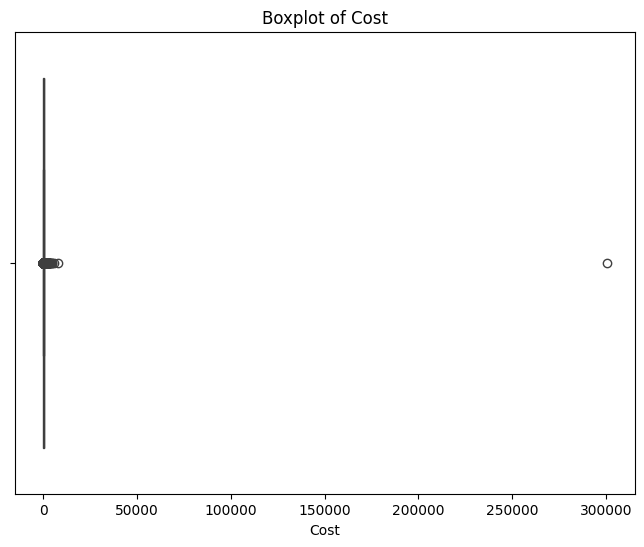

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a boxplot for the 'cost' column
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['cost'])
plt.title('Boxplot of Cost')
plt.xlabel('Cost')
plt.show()

In [32]:
# Get the count of each unique cost
cost_counts = df['cost'].value_counts().sort_index() # Sort by cost (index)

# Iterate through the cost_counts Series and print each cost and its count
for cost, count in cost_counts.items():
    print(f"Cost: {cost}, Count: {count}")

Cost: 1.0, Count: 57
Cost: 2.0, Count: 77
Cost: 3.0, Count: 5
Cost: 4.0, Count: 3
Cost: 5.0, Count: 15
Cost: 8.0, Count: 1
Cost: 10.0, Count: 41
Cost: 11.0, Count: 1
Cost: 12.0, Count: 1
Cost: 13.0, Count: 1
Cost: 14.0, Count: 2
Cost: 15.0, Count: 10
Cost: 20.0, Count: 41
Cost: 22.0, Count: 1
Cost: 24.0, Count: 3
Cost: 25.0, Count: 8
Cost: 26.0, Count: 1
Cost: 28.0, Count: 3
Cost: 29.0, Count: 2
Cost: 30.0, Count: 49
Cost: 32.0, Count: 3
Cost: 35.0, Count: 3
Cost: 38.0, Count: 1
Cost: 39.0, Count: 6
Cost: 40.0, Count: 39
Cost: 45.0, Count: 6
Cost: 48.0, Count: 1
Cost: 49.0, Count: 7
Cost: 50.0, Count: 351
Cost: 53.0, Count: 1
Cost: 54.0, Count: 1
Cost: 55.0, Count: 8
Cost: 57.0, Count: 1
Cost: 59.0, Count: 2
Cost: 60.0, Count: 120
Cost: 64.0, Count: 1
Cost: 65.0, Count: 11
Cost: 69.0, Count: 3
Cost: 70.0, Count: 84
Cost: 75.0, Count: 40
Cost: 79.0, Count: 3
Cost: 80.0, Count: 170
Cost: 84.0, Count: 1
Cost: 85.0, Count: 12
Cost: 87.0, Count: 1
Cost: 88.0, Count: 1
Cost: 89.0, Count: 3
C

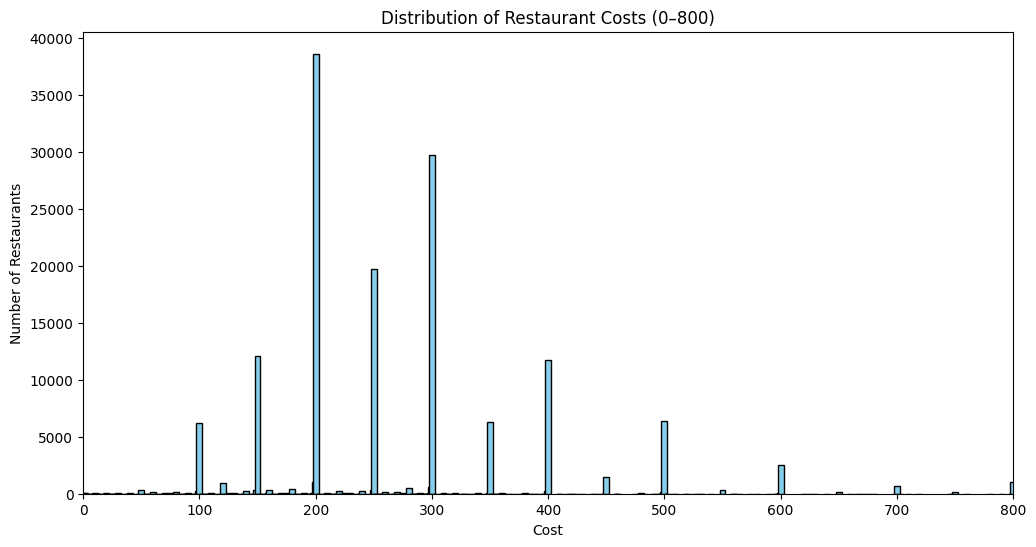

In [38]:
import matplotlib.pyplot as plt

# Get counts of each unique cost
cost_counts = df['cost'].value_counts().sort_index()

# Plot bar chart
plt.figure(figsize=(12,6))
plt.bar(cost_counts.index, cost_counts.values, width=5, color="skyblue", edgecolor="black")
plt.title("Distribution of Restaurant Costs (0–800)")
plt.xlabel("Cost")
plt.ylabel("Number of Restaurants")
plt.xlim(0, 800)   # Only show 0–800 range
plt.show()


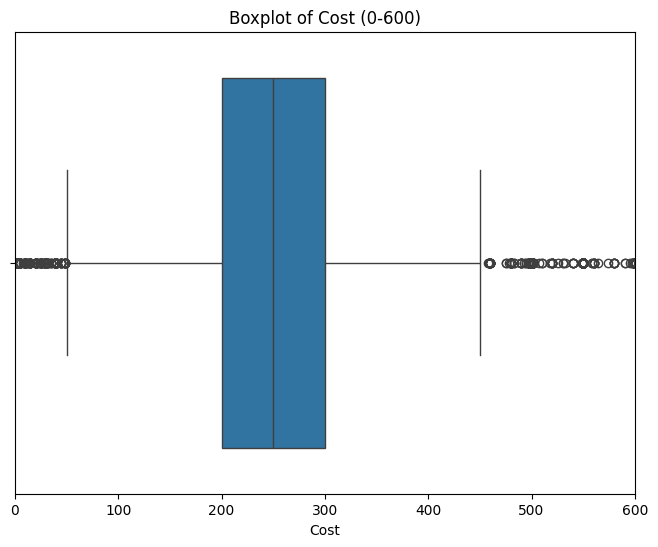

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a boxplot for the 'cost' column with a specified x-axis range
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['cost'])
plt.title('Boxplot of Cost (0-600)')
plt.xlabel('Cost')
plt.xlim(0, 600) # Set the x-axis limit
plt.show()

In [98]:
# Apply capping to the 'cost' column
df['cost'] = df['cost'].clip(lower=100, upper=500)

print("\nDataFrame head after capping 'cost':")
print(df.head())
print("\nUnique values in 'cost' after capping:")
print(df['cost'].unique())


DataFrame head after capping 'cost':
                name    city rating     rating_count   cost  \
0     ab foods point  abohar     --  too few ratings  200.0   
1  janta sweet house  abohar    4.4      50+ ratings  200.0   
2  theka coffee desi  abohar    3.8     100+ ratings  100.0   
3          singh hut  abohar    3.7      20+ ratings  250.0   
4      grill masters  abohar     --  too few ratings  250.0   

                      cuisine  \
0            beverages,pizzas   
1               sweets,bakery   
2                   beverages   
3            fast food,indian   
4  italian,american,fast food   

                                             address  
0  AB FOODS POINT, NEAR RISHI NARANG DENTAL CLINI...  
1  Janta Sweet House, Bazar No.9, Circullar Road,...  
2         theka coffee desi, sahtiya sadan road city  
3    Singh Hut, CIRCULAR ROAD NEAR NEHRU PARK ABOHAR  
4  GRILL MASTERS, ADA Heights, Abohar - Hanumanga...  

Unique values in 'cost' after capping:
[200. 100. 250

In [99]:
def categorize_cost(cost):
    if pd.isna(cost):
        return np.nan
    return round(int(cost) / 10) * 10.0

In [100]:
df['cost'] = df['cost'].apply(categorize_cost)

In [101]:
print(df['cost'].unique())

[200. 100. 250. 150. 300. 500. 400. 350. 110. 120. 180. 450. 290. 380.
 280. 420. 220. 320. 160. 210. 310. 170. 140. 410. 260. 240. 460. 330.
 130. 230.  nan 360. 270. 370. 340. 190. 440. 480. 390. 490. 430.]


In [103]:
print("\nMissing values in 'cost' column:")
print(df['cost'].isnull().sum())


Missing values in 'cost' column:
42


In [104]:
print("\nRows with missing 'cost':")
print(df[df['cost'].isnull()])


Rows with missing 'cost':
                                name                        city rating  \
4966                     chinese hut                       akola    3.7   
4983        zamzam family restaurant                       akola    3.2   
24835          anvita veg restaurant                        beed    3.7   
24836                bansi pav bhaji                        beed    3.6   
24838   sai prasad family restaurant                        beed    3.8   
24839            taj chicken chinese                        beed    3.2   
24840                 hotel maithili                        beed    3.8   
24846                         copisa                        beed    3.2   
24848              taj biryani house                        beed    2.5   
24864   shantiraj bhel pakodi center                        beed     --   
24867                   hotel haveli                        beed     --   
24886          barkha devi ice cream                        beed     --  

In [105]:
# Calculate the mean cost for each combination of 'name' and 'cuisine'
grouped_cost_mean = df.groupby(['name', 'cuisine'])['cost'].transform('mean')

# Fill NaN values in the 'cost' column with the calculated grouped mean
df['cost'] = df['cost'].fillna(grouped_cost_mean)

print("\nMissing values in 'cost' after filling with grouped mean:")
print(df['cost'].isnull().sum())


Missing values in 'cost' after filling with grouped mean:
40


In [106]:
# Calculate the mean cost for each combination of 'name' and 'cuisine'
grouped_cost_mean = df.groupby(['city', 'cuisine'])['cost'].transform('mean')

# Fill NaN values in the 'cost' column with the calculated grouped mean
df['cost'] = df['cost'].fillna(grouped_cost_mean)

print("\nMissing values in 'cost' after filling with grouped mean:")
print(df['cost'].isnull().sum())


Missing values in 'cost' after filling with grouped mean:
9


In [107]:
# Calculate the mean cost for each city
city_cost_mean = df.groupby('city')['cost'].transform('mean')

# Fill remaining NaN values in 'cost' with the calculated city mean
df['cost'] = df['cost'].fillna(city_cost_mean)

print("\nMissing values in 'cost' after filling with city mean:")
print(df['cost'].isnull().sum())


Missing values in 'cost' after filling with city mean:
0


In [108]:
print(df['cost'].unique())

[200.         100.         250.         150.         300.
 500.         400.         350.         110.         120.
 180.         450.         290.         380.         280.
 420.         220.         320.         160.         210.
 310.         170.         140.         410.         260.
 240.         460.         330.         130.         230.
 272.72727273 275.         360.         270.         370.
 340.         190.         440.         480.         390.
 490.         251.81818182 333.33333333 430.         323.46153846
 362.5        209.09090909 212.5        350.83333333 264.28571429
 218.68131868 220.82706767 260.52631579 257.14285714 225.625
 272.97297297]


In [ ]:
# Apply cost funvtion for roundoff
df['cost'] = df['cost'].apply(categorize_cost)

In [110]:
print(df['cost'].unique())

[200. 100. 250. 150. 300. 500. 400. 350. 110. 120. 180. 450. 290. 380.
 280. 420. 220. 320. 160. 210. 310. 170. 140. 410. 260. 240. 460. 330.
 130. 230. 270. 360. 370. 340. 190. 440. 480. 390. 490. 430.]


In [111]:
# Get the count of each unique cost
cost_counts = df['cost'].value_counts().sort_index() # Sort by cost (index)

# Iterate through the cost_counts Series and print each cost and its count
for cost, count in cost_counts.items():
    print(f"Cost: {cost}, Count: {count}")

Cost: 100.0, Count: 7714
Cost: 110.0, Count: 88
Cost: 120.0, Count: 1014
Cost: 130.0, Count: 119
Cost: 140.0, Count: 242
Cost: 150.0, Count: 12400
Cost: 160.0, Count: 352
Cost: 170.0, Count: 111
Cost: 180.0, Count: 529
Cost: 190.0, Count: 67
Cost: 200.0, Count: 39726
Cost: 210.0, Count: 59
Cost: 220.0, Count: 310
Cost: 230.0, Count: 89
Cost: 240.0, Count: 215
Cost: 250.0, Count: 20050
Cost: 260.0, Count: 180
Cost: 270.0, Count: 155
Cost: 280.0, Count: 583
Cost: 290.0, Count: 50
Cost: 300.0, Count: 30307
Cost: 310.0, Count: 26
Cost: 320.0, Count: 121
Cost: 330.0, Count: 18
Cost: 340.0, Count: 41
Cost: 350.0, Count: 6338
Cost: 360.0, Count: 82
Cost: 370.0, Count: 10
Cost: 380.0, Count: 69
Cost: 390.0, Count: 11
Cost: 400.0, Count: 12001
Cost: 410.0, Count: 4
Cost: 420.0, Count: 27
Cost: 430.0, Count: 3
Cost: 440.0, Count: 22
Cost: 450.0, Count: 1466
Cost: 460.0, Count: 17
Cost: 480.0, Count: 26
Cost: 490.0, Count: 7
Cost: 500.0, Count: 13779


In [112]:
df.to_csv('cost.csv', index=False)

Handling rating column NaN

In [113]:
import pandas as pd
df = pd.read_csv("E:\\Sakthi\\prasanth\\projects\\swiggypro\\swiggy\\Scripts\\cost.csv")
df

,name,city,rating,rating_count,cost,cuisine,address
0,ab foods point,abohar,--,too few ratings,200.0,"beverages,pizzas","AB FOODS POINT, NEAR RISHI NARANG DENTAL CLINI..."
1,janta sweet house,abohar,4.4,50+ ratings,200.0,"sweets,bakery","Janta Sweet House, Bazar No.9, Circullar Road,..."
2,theka coffee desi,abohar,3.8,100+ ratings,100.0,beverages,"theka coffee desi, sahtiya sadan road city"
3,singh hut,abohar,3.7,20+ ratings,250.0,"fast food,indian","Singh Hut, CIRCULAR ROAD NEAR NEHRU PARK ABOHAR"
4,grill masters,abohar,--,too few ratings,250.0,"italian,american,fast food","GRILL MASTERS, ADA Heights, Abohar - Hanumanga..."
...,...,...,...,...,...,...,...
148423,the food delight,yavatmal,--,too few ratings,200.0,"fast food,snacks","The Food Delight, 94MC+X35, New Singhania Naga..."
148424,maitri foods beverages,yavatmal,--,too few ratings,300.0,pizzas,"MAITRI FOODS & BEVERAGES, POLIC MITRYA SOCIETY..."
148425,cafe bella ciao,yavatmal,--,too few ratings,300.0,"fast food,snacks","Cafe Bella Ciao, SHOP NO 2 NEMANI MARKET SBI S..."
148426,grill zilla,yavatmal,--,too few ratings,250.0,continental,"GRILL ZILLA, SHO NO 2/6, POSTEL GROUND CHOWPAT..."


In [ ]:
print("\nMissing values in 'rating' column:")
print(df['rating'].isnull().sum())

print("\nUnique values in the 'rating' column before handling NaNs:")
print(df['rating'].unique())


Missing values in 'rating' column:
0

Unique values in the 'rating' column before handling NaNs:
['--' '4.4' '3.8' '3.7' '3.6' '4.0' '4.2' '4.7' '4.1' '3.5' '3.1' '3.4'
 '3.3' '4.8' '3.9' '2.7' '4.3' '2.9' '4.5' '2.5' '3.2' '2.4' '4.6' '3.0'
 '2.8' '2.3' '5.0' '2.6' '2.2' '1.4' '1.9' '4.9' '2.1' '1.3' '2.0' '1.8'
 '1.6' '1.1' '1.5' '1.0' '1.2' '1.7']


In [ ]:
print("\nNumber of rows in 'rating' filled with '--':")
print(len(df[df['rating'] == '--']))


Number of rows in 'rating' filled with '--':
86993


In [ ]:
# Fill with NaN for '--'

import numpy as np

df['rating'] = df['rating'].replace('--', np.nan)
print("\nNumber of rows in 'rating' filled with NaN after replacement:")
print(df['rating'].isnull().sum())


Number of rows in 'rating' filled with NaN after replacement:
86993


In [117]:
display(df['rating'])

0         NaN
1         4.4
2         3.8
3         3.7
4         NaN
         ... 
148423    NaN
148424    NaN
148425    NaN
148426    NaN
148427    NaN
Name: rating, Length: 148428, dtype: object

Handling rating count NaN

In [ ]:
print("\nNumber of unique values in 'rating_count':")
print(df['rating_count'].unique())


Number of unique values in 'rating_count':
['too few ratings' '50+ ratings' '100+ ratings' '20+ ratings'
 '500+ ratings' '1k+ ratings' '5k+ ratings' '10k+ ratings']


In [120]:
import numpy as np
df['rating_count'] = df['rating_count'].replace('too few ratings', np.nan)

print("\nMissing values in 'rating_count' after replacing 'too few ratings' with NaN:")
print(df['rating_count'].isnull().sum())


Missing values in 'rating_count' after replacing 'too few ratings' with NaN:
86993


In [121]:
print(df['rating_count'].unique())

[nan '50+ ratings' '100+ ratings' '20+ ratings' '500+ ratings'
 '1k+ ratings' '5k+ ratings' '10k+ ratings']


In [ ]:
# Display missing values count per column
print("\nMissing Values after all cleaning steps:")
print(df.isnull().sum())
print(df.dtypes)


Missing Values after all cleaning steps:
name                0
city                0
rating          86993
rating_count    86993
cost                0
cuisine             0
address             0
dtype: int64
name             object
city             object
rating           object
rating_count     object
cost            float64
cuisine          object
address          object
dtype: object


Rating Process

In [ ]:
print("\nNumber of unique values in 'rating':")
print(df['rating'].unique())


Number of unique values in 'rating':
[nan '4.4' '3.8' '3.7' '3.6' '4.0' '4.2' '4.7' '4.1' '3.5' '3.1' '3.4'
 '3.3' '4.8' '3.9' '2.7' '4.3' '2.9' '4.5' '2.5' '3.2' '2.4' '4.6' '3.0'
 '2.8' '2.3' '5.0' '2.6' '2.2' '1.4' '1.9' '4.9' '2.1' '1.3' '2.0' '1.8'
 '1.6' '1.1' '1.5' '1.0' '1.2' '1.7']


In [ ]:
import pandas as pd
# Convert 'rating' to numeric, coercing errors to NaN
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Calculate the mean rating for each restaurant name
mean = df.groupby('name')['rating'].transform('mean')

# Fill NaN values in the 'rating' column with the calculated name-wise mean rating
# This will fill NaN ratings for a specific restaurant name with the average rating of that same restaurant name
df['rating'] = df['rating'].fillna(mean)

print("\nMissing Values in 'rating' after filling with name-wise mean:")
print(df['rating'].isnull().sum())


Missing Values in 'rating' after filling with name-wise mean:
71905


In [ ]:
import numpy as np
# Identify the indices of rows where 'rating' is NaN
nan_rating = df[df['rating'].isna()].index

# Fill NaN ratings with random numbers between 3 to 4
df.loc[nan_rating, 'rating'] = np.random.uniform(3, 4, size=len(nan_rating))

print("\nMissing Values in 'rating' after filling with random values:")
print(df['rating'].isnull().sum())


Missing Values in 'rating' after filling with random values:
0


In [ ]:
print("\nUnique values in 'rating_count':")
print(df['rating'].unique())


Unique values in 'rating_count':
[3.61911009 4.4        3.8        ... 3.85244644 3.62842832 3.1698179 ]


In [127]:
df['rating'] = df['rating'].round(1)

In [128]:
print(df['rating'].unique())

[3.6 4.4 3.8 3.7 4.  3.  4.2 3.9 3.3 3.1 3.5 4.7 4.1 3.4 3.2 4.3 4.8 2.7
 2.9 4.5 2.5 2.4 4.6 2.3 2.8 5.  2.6 2.2 1.4 1.9 4.9 2.1 2.  1.3 1.8 1.6
 1.1 1.5 1.  1.2 1.7]


Rating count Process

In [129]:
df['rating_count']

0                  NaN
1          50+ ratings
2         100+ ratings
3          20+ ratings
4                  NaN
              ...     
148423             NaN
148424             NaN
148425             NaN
148426             NaN
148427             NaN
Name: rating_count, Length: 148428, dtype: object

In [130]:
import numpy as np
# Identify the indices of rows where 'rating_count' is NaN
nan_rating_count_indices = df[df['rating_count'].isna()].index

# Determine the number of NaN values
num_nan = len(nan_rating_count_indices)

# Calculate the midpoint
midpoint = num_nan // 2

# Fill the first half with 20 and the second half with 50
df.loc[nan_rating_count_indices[:midpoint], 'rating_count'] = '20+ ratings'
df.loc[nan_rating_count_indices[midpoint:], 'rating_count'] = '50+ ratings'


print("\nMissing Values in 'rating_count' after filling with 20 and 50:")
print(df['rating_count'].isnull().sum())


Missing Values in 'rating_count' after filling with 20 and 50:
0


In [131]:
df['rating_count'].unique()

array(['20+ ratings', '50+ ratings', '100+ ratings', '500+ ratings',
       '1k+ ratings', '5k+ ratings', '10k+ ratings'], dtype=object)

In [ ]:
df.to_csv('for_encode&cleaned.csv', index=False)

In [1]:
import pandas as pd

df = pd.read_csv('E:\\Sakthi\\prasanth\\projects\\swiggypro\\swiggy\\Scripts\\for_encode&cleaned.csv')

print(df.head())

                name    city  rating  rating_count   cost  \
0     ab foods point  abohar     3.6   20+ ratings  200.0   
1  janta sweet house  abohar     4.4   50+ ratings  200.0   
2  theka coffee desi  abohar     3.8  100+ ratings  100.0   
3          singh hut  abohar     3.7   20+ ratings  250.0   
4      grill masters  abohar     3.7   20+ ratings  250.0   

                      cuisine  \
0            beverages,pizzas   
1               sweets,bakery   
2                   beverages   
3            fast food,indian   
4  italian,american,fast food   

                                             address  
0  AB FOODS POINT, NEAR RISHI NARANG DENTAL CLINI...  
1  Janta Sweet House, Bazar No.9, Circullar Road,...  
2         theka coffee desi, sahtiya sadan road city  
3    Singh Hut, CIRCULAR ROAD NEAR NEHRU PARK ABOHAR  
4  GRILL MASTERS, ADA Heights, Abohar - Hanumanga...  


In [ ]:
# Display the number of NaN values in each column
print("\nFinal check for Missing Values:")
print(df.isnull().sum())



Final check for Missing Values:
name            0
city            0
rating          0
rating_count    0
cost            0
cuisine         0
address         0
dtype: int64


In [ ]:
# Get the length of each column in df
for col in df.columns:
  print(f"Length of column '{col}': {len(df[col])}")


Length of column 'name': 148428
Length of column 'city': 148428
Length of column 'rating': 148428
Length of column 'rating_count': 148428
Length of column 'cost': 148428
Length of column 'cuisine': 148428
Length of column 'address': 148428


Creating cleaned_data csv

In [ ]:
import pandas as pd
df = pd.read_csv('E:\\Sakthi\\prasanth\\projects\\swiggypro\\swiggy\\Scripts\\for_encode&cleaned.csv')
df

,name,city,rating,rating_count,cost,cuisine,address
0,ab foods point,abohar,3.6,20+ ratings,200.0,"beverages,pizzas","AB FOODS POINT, NEAR RISHI NARANG DENTAL CLINI..."
1,janta sweet house,abohar,4.4,50+ ratings,200.0,"sweets,bakery","Janta Sweet House, Bazar No.9, Circullar Road,..."
2,theka coffee desi,abohar,3.8,100+ ratings,100.0,beverages,"theka coffee desi, sahtiya sadan road city"
3,singh hut,abohar,3.7,20+ ratings,250.0,"fast food,indian","Singh Hut, CIRCULAR ROAD NEAR NEHRU PARK ABOHAR"
4,grill masters,abohar,3.7,20+ ratings,250.0,"italian,american,fast food","GRILL MASTERS, ADA Heights, Abohar - Hanumanga..."
...,...,...,...,...,...,...,...
148423,the food delight,yavatmal,4.0,50+ ratings,200.0,"fast food,snacks","The Food Delight, 94MC+X35, New Singhania Naga..."
148424,maitri foods beverages,yavatmal,3.9,50+ ratings,300.0,pizzas,"MAITRI FOODS & BEVERAGES, POLIC MITRYA SOCIETY..."
148425,cafe bella ciao,yavatmal,3.6,50+ ratings,300.0,"fast food,snacks","Cafe Bella Ciao, SHOP NO 2 NEMANI MARKET SBI S..."
148426,grill zilla,yavatmal,3.2,50+ ratings,250.0,continental,"GRILL ZILLA, SHO NO 2/6, POSTEL GROUND CHOWPAT..."


In [138]:
df['cost'] = '₹ ' + df['cost'].astype(str).str.replace('\.0', '', regex=True)

# Display the first few rows to check the result
print("\nDataFrame head after formatting 'cost':")
print(df.head())


DataFrame head after formatting 'cost':
                name    city  rating  rating_count   cost  \
0     ab foods point  abohar     3.6   20+ ratings  ₹ 200   
1  janta sweet house  abohar     4.4   50+ ratings  ₹ 200   
2  theka coffee desi  abohar     3.8  100+ ratings  ₹ 100   
3          singh hut  abohar     3.7   20+ ratings  ₹ 250   
4      grill masters  abohar     3.7   20+ ratings  ₹ 250   

                      cuisine  \
0            beverages,pizzas   
1               sweets,bakery   
2                   beverages   
3            fast food,indian   
4  italian,american,fast food   

                                             address  
0  AB FOODS POINT, NEAR RISHI NARANG DENTAL CLINI...  
1  Janta Sweet House, Bazar No.9, Circullar Road,...  
2         theka coffee desi, sahtiya sadan road city  
3    Singh Hut, CIRCULAR ROAD NEAR NEHRU PARK ABOHAR  
4  GRILL MASTERS, ADA Heights, Abohar - Hanumanga...  


In [139]:
print(df.columns.tolist())

['name', 'city', 'rating', 'rating_count', 'cost', 'cuisine', 'address']


In [140]:
# Capitalize the first letter of each column name
df.columns = [col.capitalize() for col in df.columns]

print("\nColumn Names after capitalizing the first letter:")
print(df.columns.tolist())


Column Names after capitalizing the first letter:
['Name', 'City', 'Rating', 'Rating_count', 'Cost', 'Cuisine', 'Address']


In [141]:
columns_to_capitalize = ['Name', 'City', 'Rating_count', 'Cost', 'Cuisine']

for col in columns_to_capitalize:
    if col in df.columns and df[col].dtype == 'object':
        df[col] = df[col].str.title()

print("\nDataFrame head after capitalizing words in specified columns:")
print(df.head())


DataFrame head after capitalizing words in specified columns:
                Name    City  Rating  Rating_count   Cost  \
0     Ab Foods Point  Abohar     3.6   20+ Ratings  ₹ 200   
1  Janta Sweet House  Abohar     4.4   50+ Ratings  ₹ 200   
2  Theka Coffee Desi  Abohar     3.8  100+ Ratings  ₹ 100   
3          Singh Hut  Abohar     3.7   20+ Ratings  ₹ 250   
4      Grill Masters  Abohar     3.7   20+ Ratings  ₹ 250   

                      Cuisine  \
0            Beverages,Pizzas   
1               Sweets,Bakery   
2                   Beverages   
3            Fast Food,Indian   
4  Italian,American,Fast Food   

                                             Address  
0  AB FOODS POINT, NEAR RISHI NARANG DENTAL CLINI...  
1  Janta Sweet House, Bazar No.9, Circullar Road,...  
2         theka coffee desi, sahtiya sadan road city  
3    Singh Hut, CIRCULAR ROAD NEAR NEHRU PARK ABOHAR  
4  GRILL MASTERS, ADA Heights, Abohar - Hanumanga...  


In [142]:
df.rename(columns={'Rating_count': 'Rating Count'}, inplace=True)

print("\nColumn Names after renaming 'Rating_count':")
print(df.columns.tolist())


Column Names after renaming 'Rating_count':
['Name', 'City', 'Rating', 'Rating Count', 'Cost', 'Cuisine', 'Address']


In [143]:
df

,Name,City,Rating,Rating Count,Cost,Cuisine,Address
0,Ab Foods Point,Abohar,3.6,20+ Ratings,₹ 200,"Beverages,Pizzas","AB FOODS POINT, NEAR RISHI NARANG DENTAL CLINI..."
1,Janta Sweet House,Abohar,4.4,50+ Ratings,₹ 200,"Sweets,Bakery","Janta Sweet House, Bazar No.9, Circullar Road,..."
2,Theka Coffee Desi,Abohar,3.8,100+ Ratings,₹ 100,Beverages,"theka coffee desi, sahtiya sadan road city"
3,Singh Hut,Abohar,3.7,20+ Ratings,₹ 250,"Fast Food,Indian","Singh Hut, CIRCULAR ROAD NEAR NEHRU PARK ABOHAR"
4,Grill Masters,Abohar,3.7,20+ Ratings,₹ 250,"Italian,American,Fast Food","GRILL MASTERS, ADA Heights, Abohar - Hanumanga..."
...,...,...,...,...,...,...,...
148423,The Food Delight,Yavatmal,4.0,50+ Ratings,₹ 200,"Fast Food,Snacks","The Food Delight, 94MC+X35, New Singhania Naga..."
148424,Maitri Foods Beverages,Yavatmal,3.9,50+ Ratings,₹ 300,Pizzas,"MAITRI FOODS & BEVERAGES, POLIC MITRYA SOCIETY..."
148425,Cafe Bella Ciao,Yavatmal,3.6,50+ Ratings,₹ 300,"Fast Food,Snacks","Cafe Bella Ciao, SHOP NO 2 NEMANI MARKET SBI S..."
148426,Grill Zilla,Yavatmal,3.2,50+ Ratings,₹ 250,Continental,"GRILL ZILLA, SHO NO 2/6, POSTEL GROUND CHOWPAT..."


In [144]:
df.to_csv('cleaned_data.csv', index=False)

Creating encoded_data csv

Encoding Process

In [ ]:
import pandas as pd
df = pd.read_csv('E:\\Sakthi\\prasanth\\projects\\swiggypro\\swiggy\\Scripts\\for_encode&cleaned.csv')
df

,name,city,rating,rating_count,cost,cuisine,address
0,ab foods point,abohar,3.6,20+ ratings,200.0,"beverages,pizzas","AB FOODS POINT, NEAR RISHI NARANG DENTAL CLINI..."
1,janta sweet house,abohar,4.4,50+ ratings,200.0,"sweets,bakery","Janta Sweet House, Bazar No.9, Circullar Road,..."
2,theka coffee desi,abohar,3.8,100+ ratings,100.0,beverages,"theka coffee desi, sahtiya sadan road city"
3,singh hut,abohar,3.7,20+ ratings,250.0,"fast food,indian","Singh Hut, CIRCULAR ROAD NEAR NEHRU PARK ABOHAR"
4,grill masters,abohar,3.7,20+ ratings,250.0,"italian,american,fast food","GRILL MASTERS, ADA Heights, Abohar - Hanumanga..."
...,...,...,...,...,...,...,...
148423,the food delight,yavatmal,4.0,50+ ratings,200.0,"fast food,snacks","The Food Delight, 94MC+X35, New Singhania Naga..."
148424,maitri foods beverages,yavatmal,3.9,50+ ratings,300.0,pizzas,"MAITRI FOODS & BEVERAGES, POLIC MITRYA SOCIETY..."
148425,cafe bella ciao,yavatmal,3.6,50+ ratings,300.0,"fast food,snacks","Cafe Bella Ciao, SHOP NO 2 NEMANI MARKET SBI S..."
148426,grill zilla,yavatmal,3.2,50+ ratings,250.0,continental,"GRILL ZILLA, SHO NO 2/6, POSTEL GROUND CHOWPAT..."


In [151]:
df.drop(columns=['name','rating_count','address'], inplace=True)
df

,city,rating,cost,cuisine
0,abohar,3.6,200.0,"beverages,pizzas"
1,abohar,4.4,200.0,"sweets,bakery"
2,abohar,3.8,100.0,beverages
3,abohar,3.7,250.0,"fast food,indian"
4,abohar,3.7,250.0,"italian,american,fast food"
...,...,...,...,...
148423,yavatmal,4.0,200.0,"fast food,snacks"
148424,yavatmal,3.9,300.0,pizzas
148425,yavatmal,3.6,300.0,"fast food,snacks"
148426,yavatmal,3.2,250.0,continental


In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, MultiLabelBinarizer

# Encode city with one-hot encoding
ohe = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
city_encoded = pd.DataFrame(
    ohe.fit_transform(df[['city']]),
    columns=ohe.get_feature_names_out(['city']),
    index=df.index
)

# Prepare cuisine column as lists
df['cuisine'] = df['cuisine'].str.split(',').apply(lambda x: [c.strip().lower() for c in x])

# Encode cuisines using MultiLabelBinarizer
mlb = MultiLabelBinarizer()
cuisine_encoded = pd.DataFrame(
    mlb.fit_transform(df['cuisine']),
    columns=[f"cuisine_{c}" for c in mlb.classes_],
    index=df.index
)

# Combine with rating and cost columns
df_encoded = pd.concat([df.drop(columns=['city','cuisine']), city_encoded, cuisine_encoded], axis=1)

print(df_encoded.head())


   rating   cost  city_abids & koti,hyderabad  city_abohar  city_adajan,surat  \
0     3.6  200.0                          0.0          1.0                0.0   
1     4.4  200.0                          0.0          1.0                0.0   
2     3.8  100.0                          0.0          1.0                0.0   
3     3.7  250.0                          0.0          1.0                0.0   
4     3.7  250.0                          0.0          1.0                0.0   

   city_adilabad  city_adityapur  city_adoni  city_adyar,chennai  \
0            0.0             0.0         0.0                 0.0   
1            0.0             0.0         0.0                 0.0   
2            0.0             0.0         0.0                 0.0   
3            0.0             0.0         0.0                 0.0   
4            0.0             0.0         0.0                 0.0   

   city_agartala  ...  cuisine_tandoor  cuisine_telangana  cuisine_tex-mex  \
0            0.0  ...     

In [ ]:
import pickle

df_encoded.to_csv("onehot.csv", index=False)

with open("city_encoder.pkl", "wb") as f:
    pickle.dump(ohe, f)

with open("cuisine_encoder.pkl", "wb") as f:
    pickle.dump(mlb, f)

Scaling for Rating and Cost column

In [1]:
import pandas as pd
df = pd.read_csv('E:\\Sakthi\\prasanth\\projects\\swiggypro\\swiggy\\Scripts\\onehot.csv')
print(df.head(5)) 

   rating   cost  city_abids & koti,hyderabad  city_abohar  city_adajan,surat  \
0     3.6  200.0                          0.0          1.0                0.0   
1     4.4  200.0                          0.0          1.0                0.0   
2     3.8  100.0                          0.0          1.0                0.0   
3     3.7  250.0                          0.0          1.0                0.0   
4     3.7  250.0                          0.0          1.0                0.0   

   city_adilabad  city_adityapur  city_adoni  city_adyar,chennai  \
0            0.0             0.0         0.0                 0.0   
1            0.0             0.0         0.0                 0.0   
2            0.0             0.0         0.0                 0.0   
3            0.0             0.0         0.0                 0.0   
4            0.0             0.0         0.0                 0.0   

   city_agartala  ...  cuisine_tandoor  cuisine_telangana  cuisine_tex-mex  \
0            0.0  ...     

In [ ]:
from sklearn.preprocessing import StandardScaler

# Columns to scale
num_cols = ['rating', 'cost']

scaler = StandardScaler()
df_scaled = df.copy()

df_scaled[num_cols] = scaler.fit_transform(df_scaled[num_cols])

print(df_scaled.head())

import pickle
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)


     rating      cost  city_abids & koti,hyderabad  city_abohar  \
0 -0.220407 -0.662554                          0.0          1.0   
1  1.637926 -0.662554                          0.0          1.0   
2  0.244176 -1.596964                          0.0          1.0   
3  0.011885 -0.195350                          0.0          1.0   
4  0.011885 -0.195350                          0.0          1.0   

   city_adajan,surat  city_adilabad  city_adityapur  city_adoni  \
0                0.0            0.0             0.0         0.0   
1                0.0            0.0             0.0         0.0   
2                0.0            0.0             0.0         0.0   
3                0.0            0.0             0.0         0.0   
4                0.0            0.0             0.0         0.0   

   city_adyar,chennai  city_agartala  ...  cuisine_tandoor  cuisine_telangana  \
0                 0.0            0.0  ...                0                  0   
1                 0.0           

In [3]:
df_scaled.to_csv("encoded_data.csv", index=False)